In [82]:
# Importação das bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta
from babel.numbers import format_decimal
import numpy as np

# Caminho para os arquivos CSV
path = r'c:\Users\Bruna Barreto\Desktop\Indicium\lh_ea_bruna barreto\banvic_data'

# Criação dos dataframes usados
df_agencias = pd.read_csv(path + r'\agencias.csv')
df_clientes = pd.read_csv(path + r'\clientes.csv')
df_colaborador_agencia = pd.read_csv(path + r'\colaborador_agencia.csv')
df_colaboradores = pd.read_csv(path + r'\colaboradores.csv')
df_contas = pd.read_csv(path + r'\contas.csv')
df_proposta_credito = pd.read_csv(path + r'\propostas_credito.csv')
df_transacoes = pd.read_csv(path + r'\transacoes.csv')

Quantidade de agências por UF

In [83]:
# Contar o número de agências por UF
agencias_por_uf = df_agencias['uf'].value_counts()

In [84]:
# Converter a série para um DataFrame para facilitar a plotagem
agencias_por_uf_df = agencias_por_uf.reset_index()
agencias_por_uf_df.columns = ['UF', 'Quantidade']

C:\Users\Bruna Barreto\AppData\Local\Temp\ipykernel_3768\3565340999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agencias_por_uf_df, x='UF', y='Quantidade', palette='viridis')


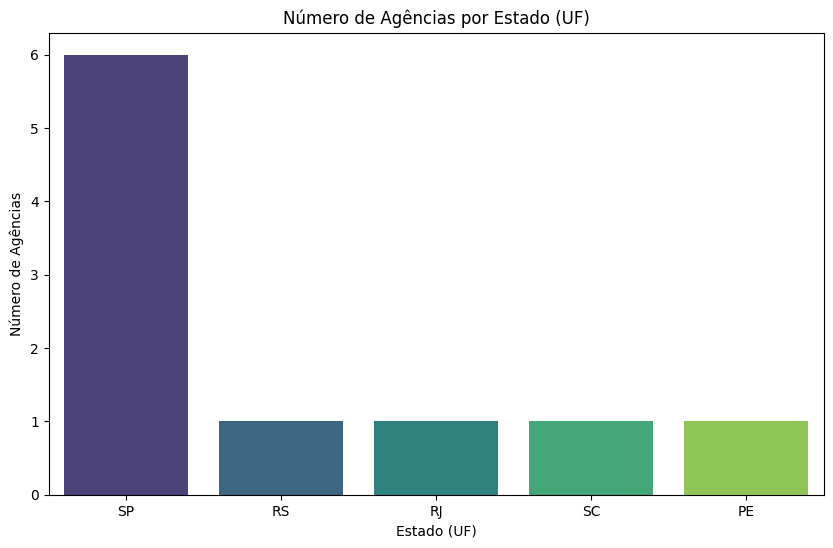

In [85]:
# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=agencias_por_uf_df, x='UF', y='Quantidade', palette='viridis')
plt.title('Número de Agências por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Agências')
plt.show()

Clientes

In [86]:
# Número de clientes PF e PJ
clientes_por_tipo = df_clientes['tipo_cliente'].value_counts()

# Verificar a presença de clientes PF e PJ
if 'PJ' not in clientes_por_tipo:
    print("Não foram encontrados dados de Pessoa Jurídica.")
else:
    print(f"Quantidade de clientes PJ: {clientes_por_tipo['PJ']}")

if 'PF' not in clientes_por_tipo:
    print("Não foram encontrados dados de Pessoa Física.")
else:
    print(f"Quantidade de clientes PF: {clientes_por_tipo['PF']}")

Não foram encontrados dados de Pessoa Jurídica.
Quantidade de clientes PF: 998


Colaborador e agência

Quantidade de colaboradores por agência:
Total de colaboradores: 100


C:\Users\Bruna Barreto\AppData\Local\Temp\ipykernel_3768\1068933489.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='cod_agencia', y='quantidade_colaboradores', data=colaboradores_por_agencia, palette='viridis')


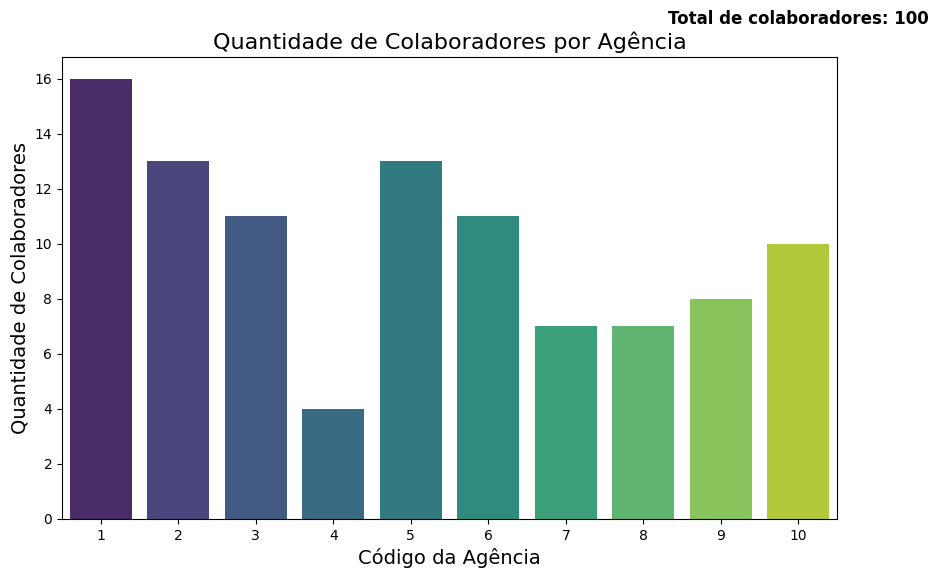

In [87]:
# Colaboradores por agência
colaboradores_por_agencia = df_colaborador_agencia.groupby('cod_agencia').size().reset_index(name='quantidade_colaboradores')
print("Quantidade de colaboradores por agência:")
colaboradores_por_agencia

# Total de colaboradores
total_colaboradores = df_colaboradores['cod_colaborador'].nunique()
print(f"Total de colaboradores: {total_colaboradores}")

# Criar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cod_agencia', y='quantidade_colaboradores', data=colaboradores_por_agencia, palette='viridis')

# Adicionar o total de colaboradores como um texto no gráfico
plt.text(len(colaboradores_por_agencia) - 1, 
         max(colaboradores_por_agencia['quantidade_colaboradores']) + 2, 
         f"Total de colaboradores: {total_colaboradores}", 
         horizontalalignment='center', fontsize=12, color='black', weight='bold')

plt.xlabel('Código da Agência', fontsize=14)
plt.ylabel('Quantidade de Colaboradores', fontsize=14)
plt.title('Quantidade de Colaboradores por Agência', fontsize=16)
plt.show()

Contas

In [88]:
# Total de contas
total_contas = df_contas['num_conta'].count()
print(f"Total de contas: {total_contas}")

Total de contas: 999


Propostas de crédito

In [89]:
# Total de propostas de crédito
total_propostas = df_proposta_credito['cod_proposta'].count()
print(f"Total de propostas de crédito: {total_propostas}")

Total de propostas de crédito: 2000


Transações bancárias

In [90]:
# Total de transações
total_transacoes = df_transacoes['cod_transacao'].count()
print(f"Total de transações: {total_transacoes}")

Total de transações: 71999


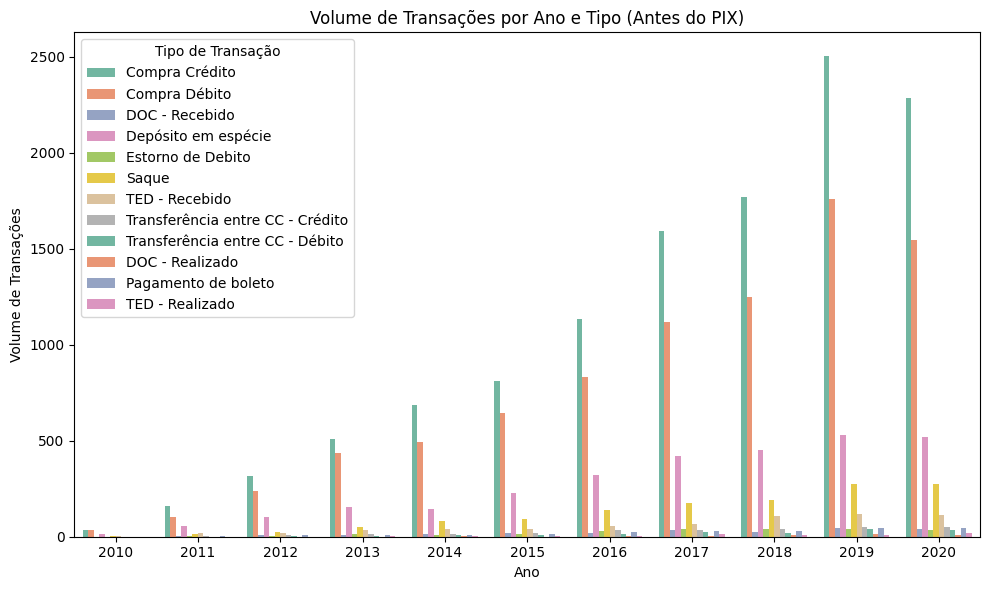

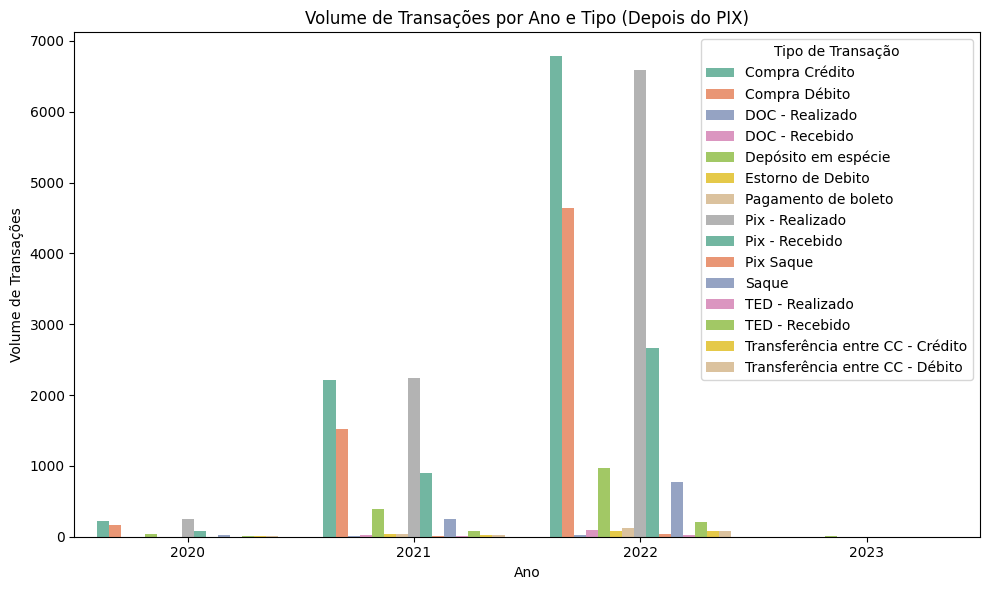

In [91]:
# Conversão da coluna data_transacao para datetime, especificando o formato
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], format='%Y-%m-%d %H:%M:%S %Z', errors='coerce')

# Dividir os dados antes e depois de 2020-11-16
data_pix = pd.Timestamp('2020-11-16 00:00:00+00:00')

df_antes_pix = df_transacoes[df_transacoes['data_transacao'] < data_pix]
df_depois_pix = df_transacoes[df_transacoes['data_transacao'] >= data_pix]

# Função para plotagem dos dados
def plot_transaction_volume(df, title):
    df['ano'] = df['data_transacao'].dt.year
    df_agrupado = df.groupby(['nome_transacao', 'ano']).size().reset_index(name='volume')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='ano', y='volume', hue='nome_transacao', data=df_agrupado, palette='Set2')
    plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Volume de Transações')
    plt.legend(title='Tipo de Transação')
    plt.tight_layout()
    plt.show()

# Plotagem antes e depois do PIX
plot_transaction_volume(df_before_pix, 'Volume de Transações por Ano e Tipo (Antes do PIX)')
plot_transaction_volume(df_after_pix, 'Volume de Transações por Ano e Tipo (Depois do PIX)')

Tempo de inatividade

In [92]:
# Tentar converter as colunas de datas, lidando com diferentes formatos
def parse_dates(date_series):
    for fmt in ('%Y-%m-%d', '%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S.%f', '%Y-%m-%d %H:%M:%S.%f %Z', 'ISO8601'):
        try:
            return pd.to_datetime(date_series, format=fmt, errors='raise')
        except (ValueError, TypeError):
            continue
    return pd.to_datetime(date_series, errors='coerce')

# Aplicar a função de conversão nas colunas de datas
df_contas['data_abertura'] = parse_dates(df_contas['data_abertura'])
df_contas['data_ultimo_lancamento'] = parse_dates(df_contas['data_ultimo_lancamento'])

# Calcular o tempo de inatividade
df_contas['tempo_inatividade'] = (df_contas['data_ultimo_lancamento'] - df_contas['data_abertura']).dt.days

# Criar o dataframe resumido
df_contas_resumido = df_contas[['num_conta', 'tempo_inatividade']]

# Ordenar do maior tempo de inatividade ao menor
df_contas_resumido = df_contas_resumido.sort_values(by='tempo_inatividade', ascending=False)

df_contas_resumido.head()

,num_conta,tempo_inatividade
126,85,4450.0
187,11,4430.0
195,972,4288.0
208,75,4135.0
158,36,3968.0


Popularidade da agência digital

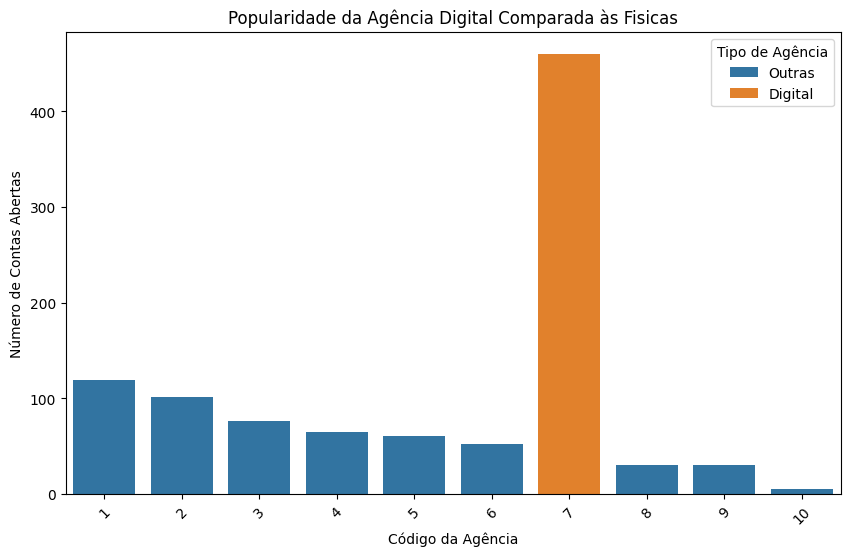

In [93]:
# Agrupar e contar o número de contas por agência
agencia_counts = df_contas.groupby('cod_agencia')['num_conta'].count().reset_index()
agencia_counts.columns = ['cod_agencia', 'num_contas']

# Destacar a agência digital
agencia_counts['agencia_tipo'] = agencia_counts['cod_agencia'].apply(lambda x: 'Digital' if x == 7 else 'Outras')

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='cod_agencia', y='num_contas', hue='agencia_tipo', data=agencia_counts, dodge=False)
plt.title('Popularidade da Agência Digital Comparada às Fisicas')
plt.xlabel('Código da Agência')
plt.ylabel('Número de Contas Abertas')
plt.legend(title='Tipo de Agência')
plt.xticks(rotation=45)
plt.show()

Quantidade de contas criadas por ano

C:\Users\Bruna Barreto\AppData\Local\Temp\ipykernel_3768\3956409560.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='ano_abertura', y='quantidade', data=contas_por_ano, palette='viridis')


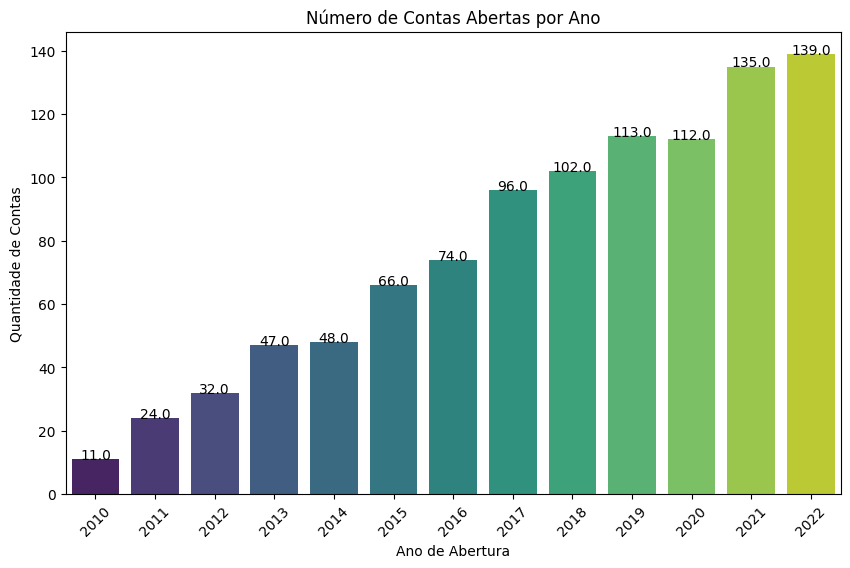

A média percentual de aumento na abertura de contas por ano é de aproximadamente 26.63%.


In [94]:
# Converter a coluna data_abertura para datetime
df_contas['data_abertura'] = pd.to_datetime(df_contas['data_abertura'])

# Extrair o ano da coluna data_abertura
df_contas['ano_abertura'] = df_contas['data_abertura'].dt.year

# Contar o número de contas por ano
contas_por_ano = df_contas.groupby('ano_abertura').size().reset_index(name='quantidade')

# Calcular o aumento percentual ano a ano
contas_por_ano['percentual_aumento'] = contas_por_ano['quantidade'].pct_change() * 100

# Calcular a média dos aumentos percentuais, ignorando o primeiro ano que será NaN
media_percentual_aumento = contas_por_ano['percentual_aumento'].mean(skipna=True)

# Criar um gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='ano_abertura', y='quantidade', data=contas_por_ano, palette='viridis')
plt.title('Número de Contas Abertas por Ano')
plt.xlabel('Ano de Abertura')
plt.ylabel('Quantidade de Contas')
plt.xticks(rotation=45)

# Adicionar a quantidade de contas criadas em cima de cada barra
for index, row in contas_por_ano.iterrows():
    barplot.text(row.name, row.quantidade, row.quantidade, color='black', ha="center")

plt.show()

print(f"A média percentual de aumento na abertura de contas por ano é de aproximadamente {media_percentual_aumento:.2f}%.")

Analisando o impacto do Pix

In [95]:
# Filtrar as transações do tipo PIX
df_pix = df_transacoes[df_transacoes['nome_transacao'].str.contains('PIX', case=False)]

In [96]:
# Ordenar as transações PIX pela data
df_pix_sorted = df_pix.sort_values(by='data_transacao')

In [97]:
# Selecionar a primeira data
data_primeiro_pix = df_pix_sorted['data_transacao'].iloc[0]

print(f"A data da primeira transação PIX foi: {data_primeiro_pix}")

A data da primeira transação PIX foi: 2020-11-16 10:54:58+00:00


In [98]:
# Filtrar as transações a partir da primeira data de transação PIX
df_transacoes_a_partir_primeiro_pix = df_transacoes[df_transacoes['data_transacao'] >= data_primeiro_pix]

In [99]:
# Contar transações PIX e outras transações a partir da primeira data de transação PIX
pix_transacoes = df_transacoes_a_partir_primeiro_pix[df_transacoes_a_partir_primeiro_pix['nome_transacao'].str.contains('PIX', case=False)].shape[0]
total_transacoes = df_transacoes_a_partir_primeiro_pix.shape[0]
outras_transacoes = total_transacoes - pix_transacoes

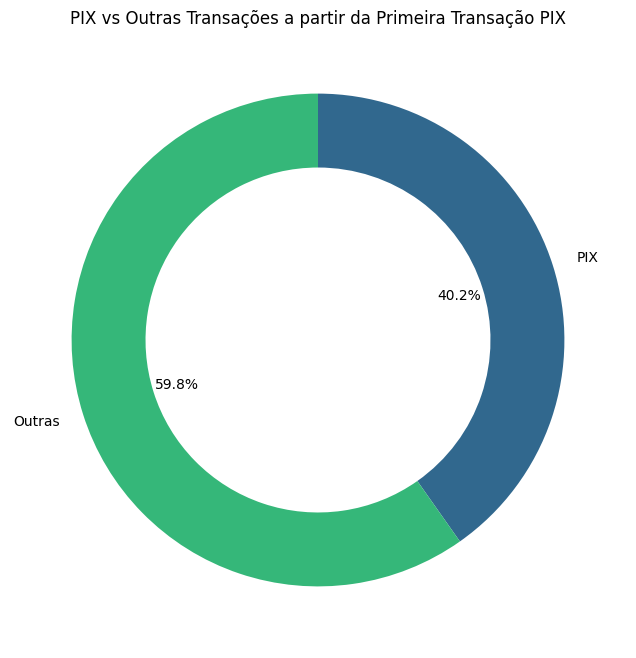

In [100]:
# Criar um DataFrame para facilitar a plotagem
dados = pd.DataFrame({
    'Tipo de Transação': ['PIX', 'Outras'],
    'Quantidade': [pix_transacoes, outras_transacoes]
})

# Criar um gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(dados['Quantidade'], labels=dados['Tipo de Transação'], colors=sns.color_palette('viridis', 2),
        startangle=90, counterclock=False, wedgeprops=dict(width=0.3), autopct='%1.1f%%')

# Adicionar título ao gráfico
plt.title('PIX vs Outras Transações a partir da Primeira Transação PIX')

# Mostrar o gráfico
plt.show()

Tabela dimensão

In [101]:
# Converter a coluna data_transacao para o tipo datetime, com errors='coerce'
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], errors='coerce')

In [102]:
# Renomear a coluna data_transacao para data para fazer a fusão
df_transacoes.rename(columns={'data_transacao': 'data'}, inplace=True)

In [103]:
# Criar a tabela de dimensão de datas a partir das transações
dim_dates = pd.DataFrame(pd.to_datetime(df_transacoes['data'].unique()), columns=['data'])

In [104]:
# Adicionar colunas adicionais
dim_dates['ano'] = dim_dates['data'].dt.year
dim_dates['mes'] = dim_dates['data'].dt.month
dim_dates['dia'] = dim_dates['data'].dt.day
dim_dates['dia_da_semana'] = dim_dates['data'].dt.strftime('%A')  # Dias da semana em inglês

# Mapear nomes dos dias da semana para português
dias_semana_pt = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

dim_dates['dia_da_semana'] = dim_dates['dia_da_semana'].map(dias_semana_pt)

# Adicionar outras colunas conforme necessário
dim_dates['trimestre'] = dim_dates['data'].dt.quarter
dim_dates['semana_do_ano'] = dim_dates['data'].dt.isocalendar().week
dim_dates['inicio_fim_mes'] = dim_dates['dia'].apply(lambda x: 'Inicio' if x <= 15 else 'Fim')

dim_dates.head()

,data,ano,mes,dia,dia_da_semana,trimestre,semana_do_ano,inicio_fim_mes
0,2020-05-22 03:15:21+00:00,2020.0,5.0,22.0,Sexta-feira,2.0,21,Fim
1,2021-06-29 11:52:38+00:00,2021.0,6.0,29.0,Terça-feira,2.0,26,Fim
2,2020-05-17 13:04:50+00:00,2020.0,5.0,17.0,Domingo,2.0,20,Fim
3,2020-09-06 02:55:34+00:00,2020.0,9.0,6.0,Domingo,3.0,36,Inicio
4,2020-10-16 09:26:52+00:00,2020.0,10.0,16.0,Sexta-feira,4.0,42,Fim


In [105]:
# Integração com dim_dates
df_transacoes = df_transacoes.merge(dim_dates, on='data')

In [106]:
# Qual dia da semana tem em média o maior volume de transações, e qual tem em média maior valor movimentado?
volume_por_dia_semana = df_transacoes.groupby('dia_da_semana').size()
valor_por_dia_semana = df_transacoes.groupby('dia_da_semana')['valor_transacao'].mean()

dia_semana_maior_volume = volume_por_dia_semana.idxmax()
dia_semana_maior_valor = valor_por_dia_semana.idxmax()

print(f"O dia da semana com maior volume médio de transações é {dia_semana_maior_volume}.")
print(f"O dia da semana com maior valor médio movimentado é {dia_semana_maior_valor}.")

O dia da semana com maior volume médio de transações é Quinta-feira.
O dia da semana com maior valor médio movimentado é Domingo.


In [107]:
# O BanVic tem em média os maiores valores movimentados no início ou final de mês?
valor_inicio_fim_mes = df_transacoes.groupby('inicio_fim_mes')['valor_transacao'].mean()
maior_valor_periodo = valor_inicio_fim_mes.idxmax()

print(f"Os maiores valores movimentados, em média, ocorrem no {maior_valor_periodo} do mês.")

Os maiores valores movimentados, em média, ocorrem no Inicio do mês.
